# Conociendo el contenido

> Este playbook require haber ejecutado "conversion-de-tipos"

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle("data/propiedades.pkl")
df.dtypes

id                               int64
titulo                          object
descripcion                     object
tipodepropiedad               category
direccion                       object
ciudad                        category
provincia                     category
antiguedad                     float64
habitaciones                   float64
garages                        float64
banos                          float64
metroscubiertos                float64
metrostotales                  float64
idzona                         float64
lat                            float64
lng                            float64
fecha                           object
gimnasio                          bool
usosmultiples                     bool
piscina                           bool
escuelascercanas                  bool
centroscomercialescercanos        bool
precio                         float64
dtype: object

In [3]:
df.shape

(240000, 23)

In [4]:
df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.252500e+07


In [7]:
maxMormalizado=('maxNormalizado', lambda s: (np.max(s)-np.mean(s))/np.std(s)) # n*std sobre la media
minNormalizado=('minNormalizado', lambda s: (np.mean(s)-np.min(s))/np.std(s)) # n*std bajo la media

In [78]:
# ignora los warnings producto de dividir por NaN

porPropiedades = df.groupby(['tipodepropiedad'])
aggSpec = ['min','max',minNormalizado,maxMormalizado]
with np.errstate(divide='ignore',invalid='ignore'):
    numColumnsStats = porPropiedades.agg({
        'precio': aggSpec,
        'metroscubiertos': aggSpec,
        'metrostotales': aggSpec,
        'antiguedad': aggSpec,
    })
# numColumnsStats.columns =["_".join(x) for x in numColumnsStats.columns.ravel()]
numColumnsStats.stack(1)

precio  metroscubiertos  \
tipodepropiedad                                                         
Apartamento             min             3.100000e+05        16.000000   
                        max             1.252000e+07       438.000000   
                        minNormalizado  1.047386e+00         1.501486   
                        maxNormalizado  4.164428e+00         4.769027   
Bodega comercial        min             3.150000e+05        20.000000   
                        max             1.250000e+07       439.000000   
                        minNormalizado  1.188344e+00         2.198559   
                        maxNormalizado  4.898857e+00         1.786652   
Casa                    min             3.100000e+05        15.000000   
                        max             1.252100e+07       439.000000   
                        minNormalizado  1.044445e+00         1.817261   
                        maxNormalizado  5.063194e+00         2.486665   
Casa en condominio      min             3.100000e+05        16.000000   
                        max             1.250000e+07       439.000000   
                        minNormalizado  1.118337e+00         1.820211   
                        maxNormalizado  4.147368e+00         2.664132   
Casa uso de suelo       min             3.200000e+05        23.000000   
                        max             1.250000e+07       439.000000   
                        minNormalizado  1.349775e+00         2.393497   
                        maxNormalizado  3.467928e+00         1.915584   
Departamento Compartido min             3.300000e+05        39.000000   
                        max             1.200000e+07       400.000000   
                        minNormalizado  9.388315e-01         1.177021   
                        maxNormalizado  3.973890e+00         3.615783   
Duplex                  min             3.200000e+05        36.000000   
                        max             1.090000e+07       410.000000   
                        minNormalizado  6.548462e-01         0.905357   
                        maxNormalizado  6.624602e+00         4.367529   
Edificio                min             3.980000e+05        18.000000   
                        max             1.250000e+07       439.000000   
...                                              ...              ...   
Oficina comercial       minNormalizado  1.206963e+00         1.290581   
                        maxNormalizado  3.993973e+00         2.577798   
Otros                   min             3.140000e+05        27.000000   
                        max             1.200000e+07       428.000000   
                        minNormalizado  9.898949e-01         1.408840   
                        maxNormalizado  3.515290e+00         2.528058   
Quinta Vacacional       min             3.200000e+05        20.000000   
                        max             1.150000e+07       438.000000   
                        minNormalizado  1.283103e+00         2.028578   
                        maxNormalizado  3.719673e+00         2.027308   
Rancho                  min             3.500000e+05        20.000000   
                        max             1.250000e+07       400.000000   
                        minNormalizado  1.117626e+00         1.757292   
                        maxNormalizado  2.569676e+00         1.850166   
Terreno                 min             3.100000e+05        15.000000   
                        max             1.250000e+07       439.000000   
                        minNormalizado  7.528443e-01         1.786237   
                        maxNormalizado  5.384904e+00         2.096590   
Terreno comercial       min             3.100000e+05        15.000000   
                        max             1.250000e+07       439.000000   
                        minNormalizado  8.702212e-01         1.569146   
                        maxNormalizado  4.036289e+00         2.234547   
Terreno industrial      min    

* De una observación superficial da la impresión de que todos los tipos de horares tienen precios similares. Es posible identificar si esta correlación es correcta?

In [130]:
# identifica las propiedades objetivo

tiposDePropiedad = df.tipodepropiedad.dtype.categories
propiedadesObjetivo = ["Casa","Casa en condominio", "Apartamento", "Duplex", "Quinta", "Departamento Compartido"]


In [137]:
hogares = df[df["tipodepropiedad"].isin(propiedadesObjetivo)]
hogares.loc[:,"tipodepropiedad"].unique()

[Apartamento, Casa en condominio, Casa, Duplex, Departamento Compartido]
Categories (5, object): [Apartamento, Casa en condominio, Casa, Duplex, Departamento Compartido]

* Calcula el precio por metro para compraraciones

In [141]:
df.loc[:,'precio_m_cubiertos'] = df['precio'] / df['metroscubiertos']
df.loc[:,'precio_m_total'] = df['precio'] / df['metrostotales'] 


* Evalua el precio por metro a nivel nacional para las categorías

In [199]:
preciosNacionales= hogares.groupby(['tipodepropiedad'])\
   .agg({
        'precio_m_cubiertos':['mean','std'],
        'precio_m_total':['mean','std'],
    }).stack()

In [200]:
preciosNacionales

precio_m_cubiertos  precio_m_total
tipodepropiedad                                                 
Apartamento             mean        22407.542741    22734.412915
                        std         12759.884812    14591.416737
Casa                    mean        11176.085449    11945.239265
                        std          5944.486017     8413.381038
Casa en condominio      mean        13934.434948    16375.521938
                        std          6922.369637    12034.901366
Departamento Compartido mean        18966.920746    18582.604084
                        std         11041.866909    12171.425200
Duplex                  mean        11514.234277    11332.239681
                        std          6467.453441     7531.440492

* Grafica los precios medios y variaciones estándares para hacer comparación visual

Text(0, 0.5, 'MX$/mt2')

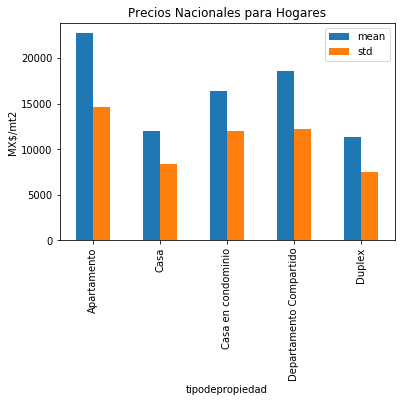

In [216]:
bplot=preciosNacionales.unstack(1).plot.bar(y=('precio_m_total'), title="Precios Nacionales para Hogares")
bplot.set_ylabel('MX$/mt2')

### Hallazgos
* Hay una variación importante entre los distintos tipos de hogares, al menos a nivel nacional.
* Las variaicion es staándares superal el 50% de las medias

Haciendo una revisión por provincia quizás los valores por metros convergan.

In [266]:
preciosprovincias= hogares.groupby(['provincia','tipodepropiedad'])\
   .agg({
        'precio_m_cubiertos':['mean','std'],
        'precio_m_total':['mean','std'],
    })
preciosprovincias.head()

precio_m_cubiertos               \
                                                       mean          std   
provincia             tipodepropiedad                                      
Aguascalientes        Apartamento              13942.322284  7816.237963   
                      Casa                      7726.404665  3900.345649   
                      Casa en condominio        8912.620457  2062.089308   
Baja California Norte Apartamento              10228.521349  5726.868568   
                      Casa                      7850.304746  4595.367642   

                                         precio_m_total                
                                                   mean           std  
provincia             tipodepropiedad                                  
Aguascalientes        Apartamento          37836.098842  73675.457420  
                      Casa                  7528.357284   3896.797186  
                      Casa en condominio    9400.227862   2610.881209  
Baja California Norte Apartamento           7285.476135   4695.166404  
                      Casa                  5881.149725   4867.440571

In [267]:
preciosprovincias.columns = ['_'.join(name) for name in preciosprovincias.columns.values]
preciosprovincias.head(3)

precio_m_cubiertos_mean  \
provincia      tipodepropiedad                               
Aguascalientes Apartamento                    13942.322284   
               Casa                            7726.404665   
               Casa en condominio              8912.620457   

                                   precio_m_cubiertos_std  \
provincia      tipodepropiedad                              
Aguascalientes Apartamento                    7816.237963   
               Casa                           3900.345649   
               Casa en condominio             2062.089308   

                                   precio_m_total_mean  precio_m_total_std  
provincia      tipodepropiedad                                              
Aguascalientes Apartamento                37836.098842        73675.457420  
               Casa                        7528.357284         3896.797186  
               Casa en condominio          9400.227862         2610.881209

In [280]:
preciosprovincias.unstack(0).stack()

precio_m_cubiertos_mean  \
tipodepropiedad         provincia                                        
Apartamento             Aguascalientes                    13942.322284   
                        Baja California Norte             10228.521349   
                        Baja California Sur               14232.969135   
                        Campeche                          14812.196570   
                        Chiapas                            9941.449314   
                        Chihuahua                         15744.145440   
                        Coahuila                          10848.340488   
                        Colima                            17933.836014   
                        Distrito Federal                  25903.460315   
                        Durango                            8723.288461   
                        Edo. de México                    17863.117211   
                        Guanajuato                        10470.730168   
                        Guerrero                          17854.260356   
                        Hidalgo                            7900.470741   
                        Jalisco                           18811.675699   
                        Michoacán                          9580.551566   
                        Morelos                           14046.462348   
                        Nayarit                           21446.214658   
                        Nuevo León                        25193.731703   
                        Oaxaca                            12616.465264   
                        Puebla                            15315.008191   
                        Querétaro                         15213.448591   
                        Quintana Roo                      19289.099683   
                        San luis Potosí                   12114.052296   
                        Sinaloa                           14545.283973   
                        Sonora                            10829.642399   
                        Tabasco                           13446.536766   
                        Tamaulipas                         8675.969006   
                        Tlaxcala                           6602.359831   
                        Veracruz                          13849.692098   
...                                                                ...   
Departamento Compartido Distrito Federal                  22909.348961   
                        Edo. de México                    15376.132798   
                        Guerrero                           6315.789474   
                        Hidalgo                           19304.083333   
                        Jalisco                           15718.632064   
                        Morelos                            5000.000000   
                        Nuevo León                        27701.277481   
                        Puebla                            17131.906796   
                        Quintana Roo                      44217.687075   
                        San luis Potosí                   13524.590164   
                        Sonora                             7784.431138   
                        Yucatán                           11179.775281   
Duplex                  Baja California Norte              8650.128585   
                        Baja California Sur               14440.504334   
                        Chiapas                           15306.122449   
                        Colima                             6540.983607   
                        Distrito Federal                  20711.362777   
                        Edo. de México                    11034.375006   
                        Guanajuato                        10604.545455   
                        Hidalgo                            8505.631868   
                        Jalisco                            9969.038013   
                        Michoacán                  

In [ ]:
preciosprovincias

### Observaciones
* De los datos listados se observa una amplia variación estándard.
* De los mínimos y máximos normalizados se observa que los valores mínimos no están tan alejados de la media, no así los valores máximos.
* Los precios mínimos de Apartamentos, casas, departamentos y duplex son similares en rangos de mínimos y máximos. Es interesante verificar si tienen la misma distribución con relación a otra variable como metros o antiguedad.
* Dada la distancia entre los máximos y la media es oportuno identificar que variables inciden en ese comportamiento, hay que tener en cuenta que en este estudio arriba expuesto est

## Estudio de la distrución del precio de apartamentos por hubicación